# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024'

In [4]:
df_insurance_checked = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_checked.csv'), index_col = False)

In [5]:
df_insurance_checked.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df_insurance_checked.shape

(1337, 8)

In [7]:
df_insurance_checked.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1332    False
1333    False
1334    False
1335    False
1336    False
Length: 1337, dtype: bool

In [8]:
df_insurance_checked.isnull().sum()

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64

# Checking For Extreme Values

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


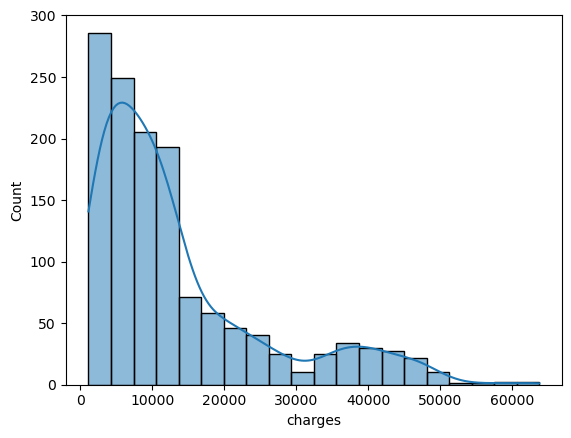

In [9]:
his_price = sns.histplot(df_insurance_checked['charges'], bins = 20, kde = True)

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


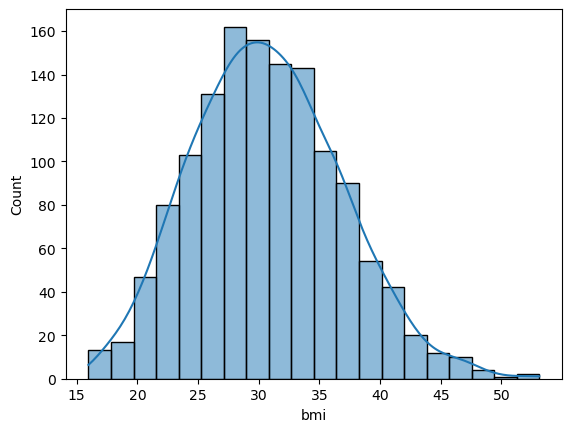

In [10]:
his_price = sns.histplot(df_insurance_checked['bmi'], bins = 20, kde = True)

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


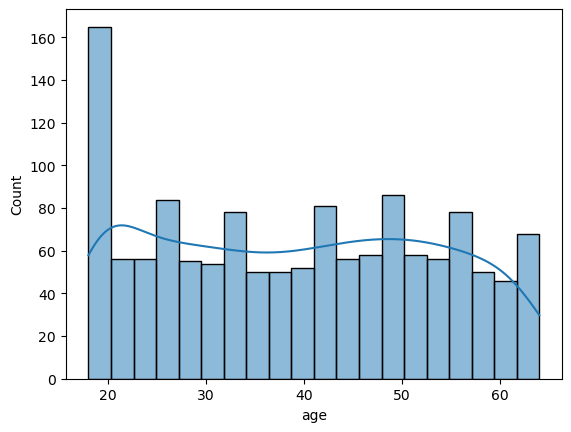

In [11]:
his_price = sns.histplot(df_insurance_checked['age'], bins = 20, kde = True)

# Exploring Relationships

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

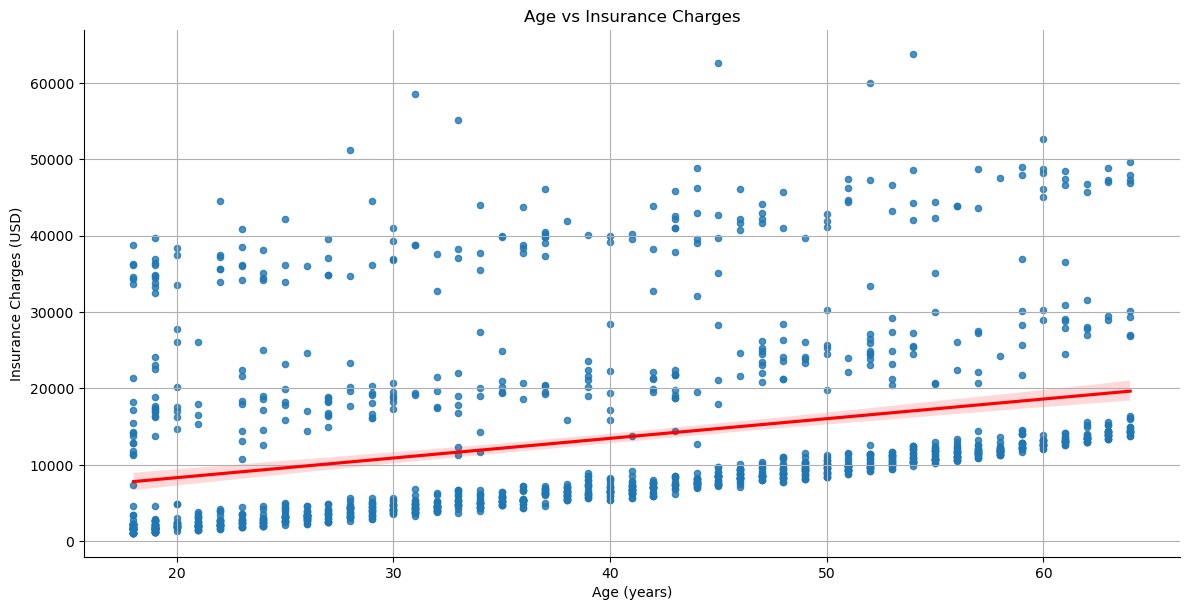

In [12]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='charges', data=df_insurance_checked, aspect=2, height=6, scatter_kws={'s': 20}, line_kws={'color': 'red'})  # Adjust marker size and add a regression line
plt.title('Age vs Insurance Charges')
plt.xlabel('Age (years)') 
plt.ylabel('Insurance Charges (USD)') 
plt.grid(True) 

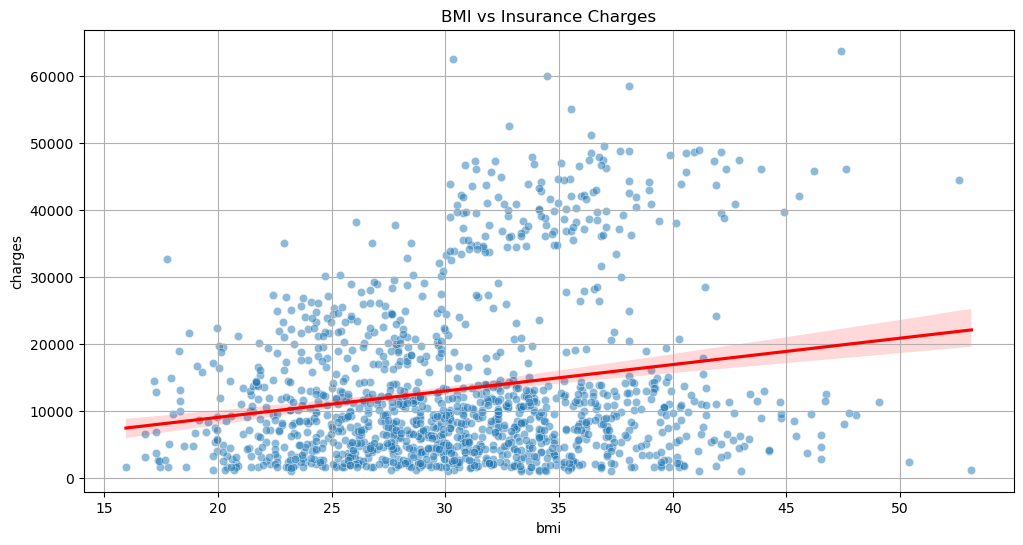

In [13]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(data=df_insurance_checked, x='bmi', y='charges', alpha=0.5)  
plt.title('BMI vs Insurance Charges') 
plt.xlabel('Body Mass Index (BMI)')  
plt.ylabel('Insurance Charges')  
plt.grid(True) 
sns.regplot(data=df_insurance_checked, x='bmi', y='charges', scatter=False, color='red')  # Overlay a regression line
plt.show()  


## Hypothesis

Insurance costs are more likely to be greater for older people than for younger
people

# Testing Age and Charges

In [14]:
# Reshaped the variables into NumPy arrays and put them into separate objects.

x = df_insurance_checked['age'].values.reshape(-1,1) # Predictor variable
y = df_insurance_checked['charges'].values.reshape(-1,1) # Response variable

In [15]:
x

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [16]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [31]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Regression Analysis

In [32]:
# Created a regression object.

regression = LinearRegression()

In [34]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [35]:
# Predicted the values of y using X.

y_predicted = regression.predict(x_test)

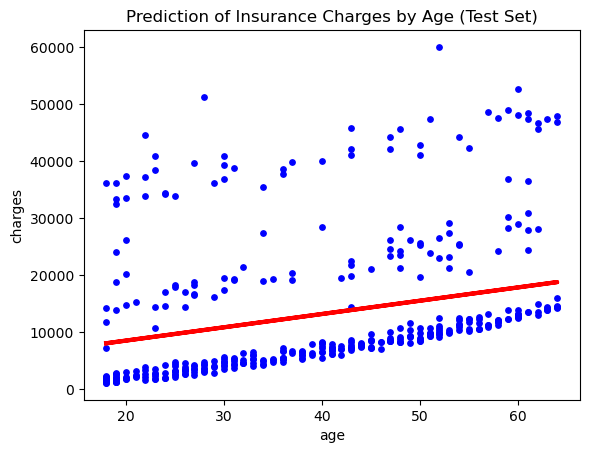

In [36]:
# Created a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='blue', s=15) 
plot_test.plot(x_test, y_predicted, color='red', linewidth=3)
plot_test.title('Prediction of Insurance Charges by Age (Test Set)')
plot_test.xlabel('age')
plot_test.ylabel('charges')
plot_test.show()

In [37]:
# Created objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [38]:
# Printed the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367438


In [39]:
# Created a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,8086.242979
1,8547.69130,14843.935802
2,9290.13950,15309.983583
3,32548.34050,8319.266870
4,9644.25250,15776.031364
5,2680.94930,9950.434103
6,2198.18985,8086.242979
7,1241.56500,8319.266870
8,2710.82855,8319.266870
9,12235.83920,17407.198597


In [41]:
# Predicted

y_predicted_train = regression.predict(x_train) # This is predicting X_train!

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367438


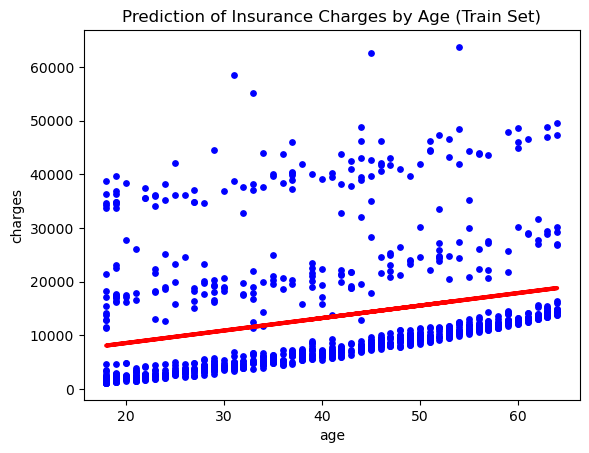

In [44]:
# Visualized the training set results.

plot_train = plt
plot_train.scatter(x_train, y_train, color='blue', s=15) 
plot_train.plot(x_train, y_predicted_train, color='red', linewidth=3)
plot_train.title('Prediction of Insurance Charges by Age (Train Set)')
plot_train.xlabel('age')
plot_train.ylabel('charges')
plot_train.show()


## Conclusion
The provided plots for the Test and Training Sets reveal a positive correlation between age and insurance charges, as both datasets display an upward regression line trend. However, if the model truly has high mean squared error (MSE) values, this indicates the predictions are not closely aligned with the actual data, which is undesirable. The suggested R-squared (R²) values of around 83% suggest that age accounts for a significant portion of the variance in charges. Yet, given that insurance costs are influenced by multiple factors, the model might be too simplistic or missing critical variables. The significant discrepancy between the actual and predicted values points to a need for model refinement, potentially through the inclusion of additional predictors or an alternative modeling strategy.

# Testing BMI and charges

In [45]:
x = df_insurance_checked['bmi'].values.reshape(-1,1) # Predictor variable
y = df_insurance_checked['charges'].values.reshape(-1,1) # Response variable

In [46]:
x

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [47]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [49]:
regression = LinearRegression() 

In [50]:
regression.fit(x_train, y_train)

LinearRegression()

In [51]:
y_predicted = regression.predict(x_test)

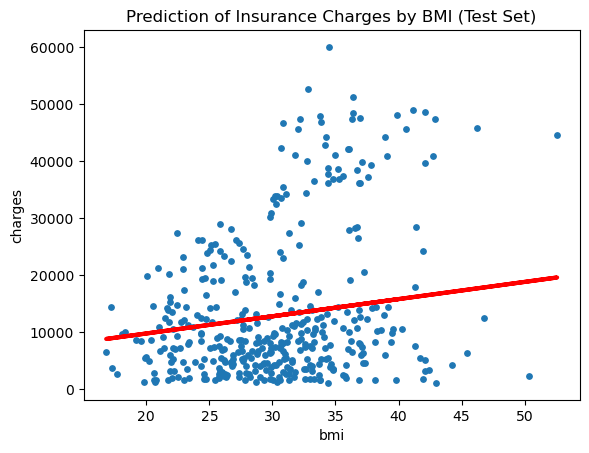

In [53]:
plot_test = plt
plot_test.scatter(x_test, y_test, s=15)
plot_test.plot(x_test, y_predicted, color='red', linewidth=3)
plot_test.title('Prediction of Insurance Charges by BMI (Test Set)')
plot_test.xlabel('bmi')
plot_test.ylabel('charges')
plot_test.show()


In [54]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [55]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  154131658.7511644
R2 score:  0.05879287466812988


In [56]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,15772.620396
1,8547.69130,12625.199187
2,9290.13950,13221.552680
3,32548.34050,12890.245184
4,9644.25250,9215.743868
5,2680.94930,9101.292188
6,2198.18985,11705.067915
7,1241.56500,9742.823975
8,2710.82855,11533.390395
9,12235.83920,14766.650364


In [57]:
y_predicted_train = regression.predict(x_train)

In [58]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  135599557.42526153
R2 score:  0.02444033897433817


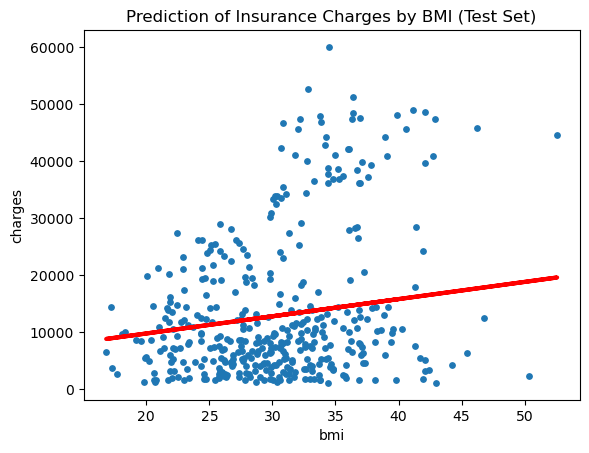

In [60]:
plot_test = plt
plot_test.scatter(x_test, y_test, s=15)
plot_test.plot(x_test, y_predicted, color='red', linewidth=3)
plot_test.title('Prediction of Insurance Charges by BMI (Test Set)')
plot_test.xlabel('bmi')
plot_test.ylabel('charges')
plot_test.show()

## Conclusion
The regression plots for BMI and insurance charges show a positive correlation, with higher BMI associated with increased charges. However, if the model has a high mean squared error, its predictions are not closely matching the actual charges, indicating a need for improvement. An R-squared value of about 80% would suggest BMI substantially explains insurance charges variability, but such a high figure could also point to oversimplification, hinting that other factors are at play. Overall, the model’s high MSE and substantial prediction errors suggest that incorporating more variables could enhance its accuracy.